In [132]:
from __future__ import print_function
from IPython.core.display import display, HTML


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from prettytable import PrettyTable

import plotly.express as px
import folium
import plotly.graph_objects as go

In [133]:
url='https://www.mohfw.gov.in'
web_content=requests.get(url).content
soup=BeautifulSoup(web_content,'html.parser')
extract_contents=lambda row:[x.text.replace('\n','') for x in row]
stats=[]
all_rows=soup.find_all('tr')
for row in all_rows:
    stat=extract_contents(row.find_all('td'))
    if(len(stat)==5):
        stats.append(stat)
new_cols=['sr.No','states/UT','Confirmed','Recovered','Deceased']
state_data=pd.DataFrame(data=stats,columns=new_cols)state_data=state_data.iloc[:33]

In [134]:
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased'] = state_data['Deceased'].map(int)

In [135]:
confirmed_total=int(state_data['Confirmed'].sum())
recovered_total=int(state_data['Recovered'].sum())
deceased_total=int(state_data['Deceased'].sum())


# COVID-19 Analysis Dashboard for India

<img src="covid.jpg" style="width=50px,height=50px"/>

In [136]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deceased_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )


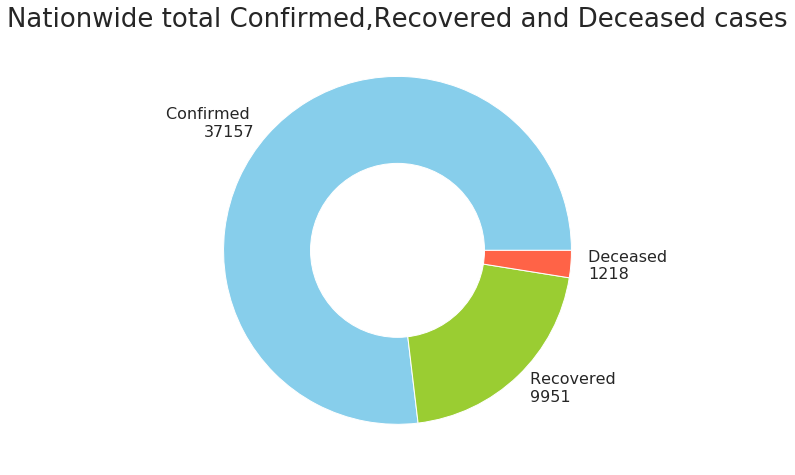

In [158]:
group_size=[sum(state_data['Confirmed']),sum(state_data['Recovered']),sum(state_data['Deceased'])]
group_labels=['Confirmed \n'+str(sum(state_data['Confirmed'])),'Recovered \n'+str(sum(state_data['Recovered'])),'Deceased \n'+str(sum(state_data['Deceased']))]
custom_colors=['skyblue','yellowgreen','tomato']
plt.figure(figsize=(8,8))
plt.pie(group_size,labels=group_labels,colors=custom_colors)
central_circle=plt.Circle((0,0),0.5,color='white')
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font',size=18)
plt.title('Nationwide total Confirmed,Recovered and Deceased cases',fontsize=26)
plt.show()

# Statewise Confirmed ,Recovered and Deceased Cases (Daily Updates)

In [138]:
table=PrettyTable()
table.field_names=(new_cols)
for i in stats:
    table.add_row(i)
table.add_row(['','Total',sum(state_data['Confirmed']),sum(state_data['Recovered']),sum(state_data['Deceased'])])
print(table)

+-------+-----------------------------+-----------+-----------+----------+
| sr.No |          states/UT          | Confirmed | Recovered | Deceased |
+-------+-----------------------------+-----------+-----------+----------+
|   1   | Andaman and Nicobar Islands |     33    |     16    |    0     |
|   2   |        Andhra Pradesh       |    1463   |    403    |    33    |
|   3   |      Arunachal Pradesh      |     1     |     1     |    0     |
|   4   |            Assam            |     43    |     32    |    1     |
|   5   |            Bihar            |    471    |     98    |    3     |
|   6   |          Chandigarh         |     88    |     17    |    0     |
|   7   |         Chhattisgarh        |     43    |     36    |    0     |
|   8   |            Delhi            |    3738   |    1167   |    61    |
|   9   |             Goa             |     7     |     7     |    0     |
|   10  |           Gujarat           |    4721   |    735    |   236    |
|   11  |           Harya

# Top 10 Worst Hit States in India

In [139]:
sorted_states_df=state_data.sort_values('Confirmed',ascending=False)

In [155]:
fig=px.scatter(sorted_states_df.head(10),x='states/UT',y='Confirmed',size='Confirmed',color='states/UT',hover_name='states/UT',size_max=60,width=800,height=500)
fig.show()

# Statewise Spread of Covid-19 on the Map of India

## Scrolling over the circles shows Confirmed Cases,Deceased Cases and Death rate of each State. 

In [142]:
states_location=[['Andaman and Nicobar Islands',11.66702557,92.73598262],['Andhra Pradesh',14.7504291,78.57002559],['Arunachal Pradesh',27.10039878	,93.61660071],['Assam',26.7499809,94.21666744],['Bihar',25.78541445,87.4799727
],['Chandigarh',30.71999697,76.78000565],['Chhattisgarh',22.09042035,82.15998734],['Delhi',28.6699929,77.23000403],['Goa',15.491997	,73.81800065],['Gujarat',22.309425,72.13623],['Haryana',28.45000633,77.01999101],['Himachal Pradesh',31.10002545,77.16659704],['Jammu And Kashmir',34.29995933,74.46665849],['Jharkhand',23.80039349,86.41998572],['Karnataka',12.57038129,76.91999711],['Kerala',8.900372741	,76.56999263],['Ladakh',34.152588,77.577049],['Madhya Pradesh',21.30039105,76.13001949],['Maharashtra',19.25023195,73.16017493],['Manipur',24.79997072,93.95001705],['Meghalaya',25.57049217,91.8800142],['Mizoram',23.71039899,92.72001461],['Odisha',19.82042971,85.90001746],['Puducherry',11.93499371,79.83000037],['Punjab',31.51997398,75.98000281],['Rajasthan',26.44999921,74.63998124],['Tamil Nadu',12.92038576,79.15004187],['Telengana',17.123184,79.208824],['Tripura',23.83540428,91.27999914],['Uttarakhand',30.0668,79.0193],['Uttar Pradesh',27.59998069,78.05000565],['West Bengal',22.58039044,88.32994665]]
state_loc=pd.DataFrame(states_location,columns=['states/UT','lat','long'])

In [143]:
states=pd.merge(state_data,state_loc, on='states/UT')

In [145]:
import folium
import numpy as np
Indian_map = folium.Map(location=[20, 85], tiles="cartodbpositron", zoom_start=5, max_zoom = 12, min_zoom = 4)


for i in range(0,len(states)):
    folium.Circle(
        location=[states.iloc[i]['lat'], states.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(states.iloc[i,-1]+1.00001)))+0.2)*40000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+states.iloc[i]['states/UT'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(states.iloc[i]['Confirmed'])+"</li>"+
                        "<li>Deaths:   "+str(states.iloc[i]['Deceased'])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(states.iloc[i]['Deceased']/(states.iloc[i]['Confirmed']+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(Indian_map)

Indian_map